## 2D Lattice Ising model
#### solved by Metropolis algorithm

Magnetism is occured by spin, which is innate physical value like mass. A electron has spin $ \pm \frac{1}{2}$, because it is a fermion(anti-symmetrical particle). The spin is sort of binary system, having two possible state. I denoted the spin as {-1,1} to make calculation easy.
The state of Magnetism has two different type of behavior, ferromagnetism and paramagnetism. The former is the circumstance that spin coupling effect is dominant, while the later is self-magnetization by external magnetism is dominant. The two source of magnetization can be written by,

$$ H=-J\sum_{i,j}{\sigma_{i}\sigma_{j}}-h\sum_{i}{\sigma_{i}} \;\;\; [Hamiltonian\;of\; Magnetism]$$

I assumed that there is no any external magnetism, so $h=0$. Then, Hamiltonian of mangetism become simple as

$$H=-J\sum_{i,j}{\sigma_{i}\sigma_{j}} \;\; [Ising\;model]$$

To calculate the value, we shold set configuration of atoms. I set a simple 2D lattice. But even we set a simple structure, it's still too heavy to calculate. So, we only consider neighborhood, which are up, down, right, and left. Then our Hamiltonian becomes

$$H=-J\sum_{<i,j>}{\sigma_{i}\sigma_{j}} \;\; [Ising\;model].$$

<i,j> means that we only consider neighborhood. And J determines how to change spin. When J >0, spin tends to become similiar with neighborhood, while J<0, spin tend to become opposite to neighborhood, and when J=0, spin does not change, just stays its own state. I only considered J<0, ferromanetism.

By canonical ensemble in Thermodynamics, when determined the Hamiltonian of the system, we can compute possibilities of each state.

$$ P_{i}=\frac{exp(-\beta H_{i})}{Z}, \; Z=\sum_{i}{exp(-\beta H_{i})} $$

For applying Metropolis algorithm, we shoulb consider appectance.

$$ A=\frac{P(\sigma_{now} \to \sigma_{new})}{P(\sigma_{new} \to \sigma_{now})}=\frac{\frac{exp(-\beta H_{new})}{Z}}{\frac{exp(-\beta H_{now})}{Z}}=exp(-\beta \Delta H)$$

$$\Delta H=-J \sigma_{i}\sum_{<i,j>}\sigma_{j} -(-1) -J\sigma_{i} \sum_{<i,j>}\sigma_{j}=-2J\sigma_{i} \sum_{<i,j>}\sigma_{j}$$

Then Metropolis Algoritm becomes
$$\begin{equation} \sigma_{i}^{*} =
    \begin{cases}
      -\sigma_{i} & \text{When A >= 1}\\
      -\sigma_{i} & \text{with possibility A when A < 1}\\
      \sigma_{i} & \text{otherwise}
    \end{cases}       
\end{equation}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rdom
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#상태 초기화
def initialize(L,level):
    #return np.ones((L,L))
    return rdom.randint(0,level,size=(L,L))
    #return np.append(np.ones((int(L/2),L)),-1*np.ones((int(L/2),L)),axis=0)

In [3]:
np.unique(initialize(100,4))

array([0, 1, 2, 3])

In [4]:
#metropolis algorithm
def sweep(state,level,J,T):
    for k in range(state.size):
        L=int(len(state))
        sel_x, sel_y= rdom.randint(0,L,size=2)
        
        sel_level = rdom.randint(0,level)
        
        pos_T=T[sel_x,sel_y]
        
        beta=1/pos_T
        
        
        #neighbor
        neighbor_=[state[(sel_x-1)%L,(sel_y+1)%L], #1번, (-1,1)
                   state[sel_x,(sel_y+1)%L], #2번, (0,1)
                   state[(sel_x+1)%L,(sel_y+1)%L], #3번, (1,1)
                   state[(sel_x-1)%L,sel_y], #4번, (-1,0)
                   state[(sel_x+1)%L,sel_y], #6번, (1,0)
                   state[(sel_x-1)%L,(sel_y-1)%L], #7번, (-1,-1)
                   state[sel_x,(sel_y-1)%L], #8번, (0,-1)
                   state[(sel_x+1)%L,(sel_y-1)%L]] #9, (1,-1)
        
        
        E0, E1 = 0,0
        for stat in neighbor_:
            E0 += J[state[sel_x,sel_y],stat]
            E1 += J[sel_level,stat]
        
        delta_E=E1-E0
            
        
        if delta_E>=0 or rdom.uniform()<np.exp(beta*delta_E):
            state[sel_x,sel_y] = sel_level
    return state

In [5]:
#metropolis algorithm
def sweep_J(state,level,dic_J,T,beta=1/2):
    for k in range(state.size):
        L=int(len(state))
        sel_x, sel_y= rdom.randint(0,L,size=2)
        
        sel_level = rdom.randint(0,level)
        
        pos_T=T[sel_x,sel_y]
        
        
        #neighbor
        neighbor_=[state[(sel_x-1)%L,(sel_y+1)%L], #1번, (-1,1)
                   state[sel_x,(sel_y+1)%L], #2번, (0,1)
                   state[(sel_x+1)%L,(sel_y+1)%L], #3번, (1,1)
                   state[(sel_x-1)%L,sel_y], #4번, (-1,0)
                   state[(sel_x+1)%L,sel_y], #6번, (1,0)
                   state[(sel_x-1)%L,(sel_y-1)%L], #7번, (-1,-1)
                   state[sel_x,(sel_y-1)%L], #8번, (0,-1)
                   state[(sel_x+1)%L,(sel_y-1)%L]] #9, (1,-1)
        
        
        E0, E1 = 0,0
        for stat in neighbor_:
            E0 += dic_J[pos_T][state[sel_x,sel_y],stat]
            E1 += dic_J[pos_T][sel_level,stat]
        
        delta_E=E1-E0
            
        
        if delta_E>=0 or rdom.uniform()<np.exp(beta*delta_E):
            state[sel_x,sel_y] = sel_level
    return state

In [262]:
#Species Richness Index
def RI(state):
    sp_num=len(np.unique(state))
    tot_num=np.size(state)
    return (sp_num-1)/np.log(tot_num)

#Shannon Diversity
def H(state):
    tot_num=np.size(state)
    p_=[]
    for val in np.unique(state):
        p_.append(np.sum(state==val)/tot_num)
    anw=0
    for pval in p_:
        anw += -pval*np.log(pval)
    
    return anw

#Species Evenness
def EI(state):
    sp_num=len(np.unique(state))
    DI=H(state)
    
    return DI/np.log(sp_num)

#Simpson index

def SI(state):
    tot_num=state.size
    anw=0
    for val in np.unique(state):
        val_num=np.sum(state==val)
        anw += (val_num*(val_num-1))
    return 1-anw/(tot_num*(tot_num-1))

In [263]:
#설정값
Temp=1 #온도. [K]
J=1 #J. -1은 식에 이미 더해져 있기에, >0 인 값만 사용.
L=100 #N=L x L. 한 변의 입자수
level=3 #상태 수

In [264]:
#Ising style
J_ising=np.array([[J,-J,-J],[-J,J,-J],[-J,-J,J]])

#3_level J

J_3lev=np.array([[0.8J,J, 0.2J],[1J,0.3J,0.5J],[1J,0.5J,0.3J]])

#4_level J for squre temp

J_square={0:np.array([[1.01*J,-J, -J,-J],[-J,J,-J,-J],[-J,-J,J,-J],[-J,-J,-J,J]]),
         Temp:np.array([[J,-J, -J,-J],[-J,1.01*J,-J,-J],[-J,-J,J,-J],[-J,-J,-J,J]]),
         2*Temp:np.array([[J,-J, -J,-J],[-J,J,-J,-J],[-J,-J,1.01*J,-J],[-J,-J,-J,J]]),
         3*Temp:np.array([[J,-J, -J,-J],[-J,J,-J,-J],[-J,-J,J,-J],[-J,-J,-J,1.01*J]])}

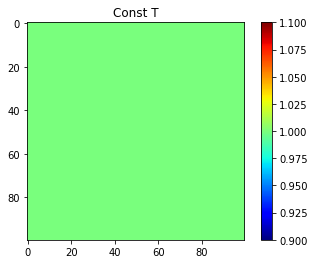

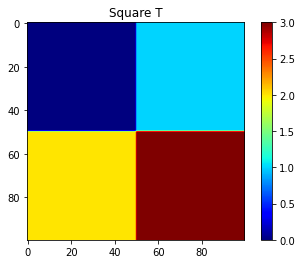

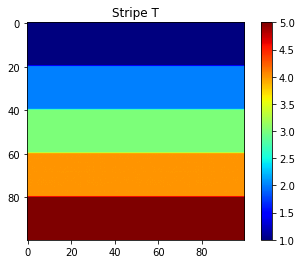

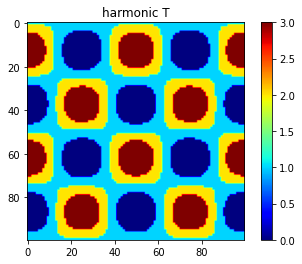

In [265]:
#Const T
T_const=Temp*np.ones([L,L])

plt.title("Const T")
plt.imshow(T_const,cmap="jet")
plt.colorbar()
plt.show()


#sqaure T
x_=np.arange(0,L)
y_=np.arange(0,L)
mesh_x, mesh_y = np.meshgrid(x_,y_)
A_x=mesh_x>= L/2
A_y=mesh_y>= L/2
T_square=A_x*A_y+A_x+2*A_y
T_square=Temp*T_square

plt.title("Square T")
plt.imshow(T_square,cmap="jet")
plt.colorbar()
plt.show()

#stripe T
line_number=5
T_stripe=np.ones((L,L))
for idx in range(L):
    T_stripe[idx,:]= idx//(L/line_number) + Temp

plt.title("Stripe T")
plt.imshow(T_stripe,cmap="jet")
plt.colorbar()
plt.show()

#sin,cos T
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

x = np.linspace(0, 4*np.pi, L)
y = np.linspace(0, 4* np.pi, L)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y)

X =Z.reshape(-1,1)
kmeans=KMeans(n_clusters=4).fit(X)
T_har=kmeans.cluster_centers_[kmeans.labels_]
T_har=T_har.reshape(Z.shape)


for idx, val in enumerate(np.unique(T_har)):
    T_har=np.where(T_har!=val,T_har,idx)

T_har=Temp*T_har

plt.title("harmonic T")
plt.imshow(T_har,cmap="jet")
plt.colorbar()
plt.show()

In [ ]:
state=initialize(L,level)
np.unique(state)

In [ ]:
#Spin Pattern Simulation setting.
%matplotlib inline

fig = plt.figure()
plt.title("2D lattice Potts model \n $N_{sp}=$"+ str(level)+ r"  $\beta$ ="+str(Temp))

im =plt.imshow(state,animated=True,cmap="Spectral",interpolation="none")
plt.plot([None],[None],'s',color="darkred",label='A')
plt.plot([None],[None],'s',color="peachpuff",label='B')
plt.plot([None],[None],'s',color="rebeccapurple",label='C')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.03), shadow=True, ncol=4)
plt.axis("off")


RI_=[RI(state)]
H_=[H(state)]
EI_=[EI(state)]
SI_=[SI(state)]

p1_=[np.sum(state==0)/np.size(state)]
p2_=[np.sum(state==1)/np.size(state)]
p3_=[np.sum(state==2)/np.size(state)]
p4_=[np.sum(state==3)/np.size(state)]

t=0
t_=[t]

def update_fig(*args):
    global state,RI_,H_,EI_,SI_,t,t_,p1_,p2_,p3_
    
    #state=sweep_J(state,level,J_square,T_square)
    state=sweep(state,level,J_ising,T_const)
    im.set_array(state)
    
    RI_.append(RI(state))
    H_.append(H(state))
    EI_.append(EI(state))
    SI_.append(SI(state))
    
    p1_.append(np.sum(state==0)/np.size(state))
    p2_.append(np.sum(state==1)/np.size(state))
    p3_.append(np.sum(state==2)/np.size(state))
    p4_.append(np.sum(state==3)/np.size(state))
    
    t +=1
    t_.append(t)
    
    return im,

In [ ]:
#Spin Pattern Simulation process and Edit as a vedio.
ani = animation.FuncAnimation(fig, update_fig, #update_fig: 다음 step에 적용할 함수.
                              frames=1000, #전체 이미지 수. 즉, 몇 step을 할 것인가?
                              interval=20, #이미지 간 간격. 즉, 한 step간의 시간 간격은? [msec]
                              blit=True) #optimizer 사용유무.
HTML(ani.to_html5_video())

In [ ]:
plt.plot(t_,H_,label="H")
plt.plot(t_,EI_,label="EI")
plt.plot(t_,RI_,label="RI")
plt.plot(t_,SI_,label="SI")
plt.legend()
plt.show()

In [ ]:
plt.plot(t_,np.array(p1_),label='A')
plt.plot(t_,np.array(p2_),label="B")
plt.plot(t_,np.array(p3_),label='C')
#plt.plot(t_,np.array(p4_),label='p4')
plt.legend()
plt.show()

In [271]:
def J_N(level):
    J=1*np.ones([level,level])
    for idx in range(level):
        J[idx,idx]=-1
    return J

In [272]:
L=50

min_lev=3
max_lev=30

eq_t=100
iteration=10

lev_RI=[]
lev_H=[]
lev_EI=[]
lev_SI=[]

Temp=0.1

for lev in range(min_lev,max_lev):
    print(lev)
    
    state=initialize(L,lev)

    
    for tdx in range(eq_t):
        state=sweep(state,level,J_N(lev),Temp*np.ones([L,L]))
        
    ins_RI=[RI(state)]
    ins_H=[H(state)]
    ins_EI=[EI(state)]
    ins_SI=[SI(state)]
        
    for idx in range(iteration):
        state=sweep(state,level,J_N(lev),Temp*np.ones([L,L]))
        
        ins_RI.append(RI(state))
        ins_H.append(H(state))
        ins_EI.append(EI(state))
        ins_SI.append(SI(state))
        
    lev_RI.append(np.average(ins_RI))
    lev_H.append(np.average(ins_H))
    lev_EI.append(np.average(ins_EI))
    lev_SI.append(np.average(ins_SI))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


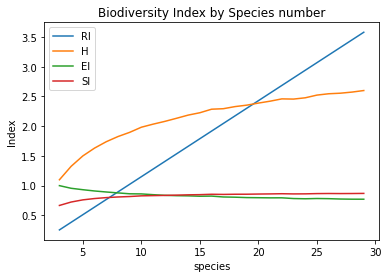

In [276]:
lev_=range(min_lev,max_lev)
plt.title("Biodiversity Index by Species number")
plt.plot(lev_,lev_RI,label="RI")
plt.plot(lev_,lev_H,label="H")
plt.plot(lev_,lev_EI,label="EI")
plt.plot(lev_,lev_SI,label="SI")
plt.xlabel("species")
plt.ylabel("Index")
plt.legend()
plt.show()

In [ ]:
lev=10

min_L=2
max_L=100

eq_t=100
iteration=10

Temp=0.1

L_RI=[]
L_H=[]
L_EI=[]
L_SI=[]


for L in range(min_L,max_L):
    print(L)
    
    state=initialize(L,lev)

    
    for tdx in range(eq_t):
        state=sweep(state,level,J_N(lev),Temp*np.ones([L,L]))
        
    ins_RI=[RI(state)]
    ins_H=[H(state)]
    ins_EI=[EI(state)]
    ins_SI=[SI(state)]
        
    for idx in range(iteration):
        state=sweep(state,level,J_N(lev),Temp*np.ones([L,L]))
        
        ins_RI.append(RI(state))
        ins_H.append(H(state))
        ins_EI.append(EI(state))
        ins_SI.append(SI(state))
        
    L_RI.append(np.average(ins_RI))
    L_H.append(np.average(ins_H))
    L_EI.append(np.average(ins_EI))
    L_SI.append(np.average(ins_SI))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [ ]:
L_=np.log10(np.arange(min_L,max_L)**2)
#_=np.arange(min_L,max_L)
plt.title("Biodiversity Index by Lattice size N")
plt.plot(L_,L_RI,label="RI")
plt.plot(L_,L_H,label="H")
plt.plot(L_,L_EI,label="EI")
plt.plot(L_,L_SI,label="SI")
plt.xlabel("Lattice size $log\;N$")
plt.ylabel("Index")
plt.legend()
plt.show()